In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import jax.numpy as jnp
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

def download_mnist_to_jax():
    # Download MNIST dataset
    try:
        mnist = fetch_openml("mnist_784", version=1, parser='auto')
    except:
        import ssl
        ssl._create_default_https_context = ssl._create_unverified_context  # fine here, but only do this if you trust the source
        mnist = fetch_openml("mnist_784", version=1, parser='auto')
    
    # Extract features and labels
    data = mnist.data.astype('float32')
    labels = mnist.target.astype('int32')

    # Normalize pixel values to be between 0 and 1
    data /= 255.0

    # Convert to JAX arrays
    jax_data = jnp.array(data)
    jax_labels = jnp.array(labels)

    return jax_data, jax_labels

# Example usage
mnist_data, mnist_labels = download_mnist_to_jax()
print("MNIST Data Shape:", mnist_data.shape)
print("MNIST Labels Shape:", mnist_labels.shape)

MNIST Data Shape: (70000, 784)
MNIST Labels Shape: (70000,)


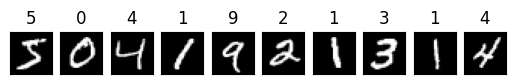

In [7]:
fig, axs = plt.subplots(1, 10)
for ax, digit, label in zip(axs, mnist_data, mnist_labels):
    ax.imshow(digit.reshape((28, 28)), cmap='gray', vmin=0, vmax=1);
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)